In [203]:
import numpy as np
import matplotlib.pyplot as plt

### Loss function for linear Regression
\begin{equation}
J = MSE = \frac{1}{2*N} * \sum(Y - h(\theta))^2
\end{equation}

In [308]:
def cost_function(Y,X,theta):
    
    predictions = np.dot(X,theta)
    
    error = np.sum(np.square(Y-predictions))
    
    error = error/(2*len(Y))
    
    return error

### Gradient Descent
#### Optimizing parameters depends on partial derivatives (as each paramater contribute to the model performance)
\begin{equation}
\frac{1}{N} \frac{\partial J}{\partial m} =\sum [-2*X (Y - (m*X + b))]
\end{equation}

\begin{equation}
\frac{1}{N} \frac{\partial J}{\partial b} = \sum [-2* (Y - (m*X + b))]
\end{equation}

\begin{equation}
    \theta = \theta - \alpha * \frac{\partial J(\theta)}{\partial \theta}
\end{equation}

In [316]:
def update_weights(y_truth,X,theta,lr): # one iter of gradient descent:
    
    m=len(y_truth)
    predictions = np.dot(X,theta)
        
    theta = theta - (1/m) * lr * X.T.dot(predictions - y)
    
    return theta

In [361]:
def gradient_descent(X,y,theta,lr=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = []
    theta_history = []
    
    for i in range(iterations):
        
        
        theta = update_weights(y,X,theta,lr)
        
        theta_history.append(theta.T)
        
        cost_history.append(cost_function(Y,X,theta))
        
        if(i%50==0):
            print('iter: {:d}, Cost:  {:0.3f}'.format(i,cost_history[i]))
        
    return theta, cost_history, theta_history
        
    
    

In [423]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X+np.random.rand(100,1)

Text(0, 0.5, 'y')

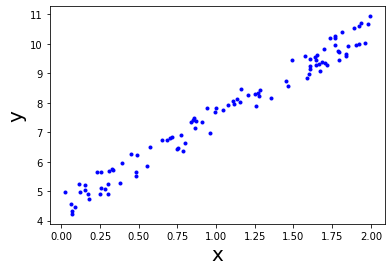

In [424]:
plt.plot(X,y,'b.')
plt.xlabel("x",fontsize=20)
plt.ylabel("y",fontsize=20)

In [447]:
lr =0.05
n_iter = 100

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.5f}'.format(cost_history[-1]))

iter: 0, Cost:  3.799
iter: 50, Cost:  27.272
Theta0:          3.973,
Theta1:          3.428
Final cost/MSE:  27.36055


In [448]:
def calc_params(X: np.ndarray, Y: np.ndarray) -> (np.ndarray, float):

    m = (len(X) * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (len(X) * np.sum(X*X) - np.sum(X)**2)
        
    ## calculate intercept
    b = np.sum(Y) - (m * np.sum(X))

    b = b/len(X)

    return np.around(m,2), np.around(b,2)

In [449]:
def plot(X,Y):
    
    m1,b1 = theta[1],theta[0]
    print("GD:",'Slope of line:',m1,", Y-intercept:",b1)
    
    
    m2,b2 = calc_params(X,Y)
    print("Least Sq:",'Slope of line:',m2,", Y-intercept:",b2)
    
    plt.scatter(X,Y)

    plt.plot(X, m1*X+b1, '-r', label='Y='+str(m1)+'*X+'+str(b1))
    plt.plot(X, m2*X+b2, '-.g', label='Y='+str(m2)+'*X+'+str(b2))
    
    plt.legend(loc='upper left')